In [1]:
from tensorflow import keras

In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#### 데이터 수집 및 전처리, 분리하기

In [3]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_input.shape, test_input.shape, train_target.shape, test_target.shape

train_scaled = train_input / 255.0
train_scaled.shape

from sklearn.model_selection import train_test_split
train_scaled, val_sclaed, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)
train_scaled.shape, val_sclaed.shape, train_target.shape, val_target.shape

((48000, 28, 28), (12000, 28, 28), (48000,), (12000,))

#### 모델 및 계층을 생성하는 함수

In [4]:
def model_fn(a_layer=None):
    # 모델생성
    model = keras.Sequential()
    
    # 전처리 계층
    model.add(keras.layers.Flatten(input_shape = (28,28)))
    
    # 은닉층
    model.add(keras.layers.Dense(100, activation='relu'))
    
    # 추가할 계층이 있는 경우 아래 적용됨
    # - 추가성능을 위래 추가할 계층이 있는 경우 사용
    if a_layer:
        model.add(a_layer)
        
    #출력층
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    # 모델 반환
    return model

### 성능 향상 방법

#### 규제방법 : Dropout()
#### - 훈련과정에서 층이 있는 일부 뉴런(사용되는 데이터)을 랜덤하게 꺼서 과대적합을 막는 방법
#### - 뉴런을 끈다는 의미는 일부 데이터의 출력결과를 0으로 만든다는 의미
#### - 0은 출력이 안됨(다음 계층으로 출력결과가 전달이 안됨)

#### Dropout을 사용하는 이유
#### - 신경망 모델이 너무 똑똑해 지는 것을 방지하기 위함
#### - 너무 똑똑해 지면 과대적합이 발생할 확률이 높아짐(조금 멍청하게 만드느 방법)

#### Dropout이 과대적합을 줄이는 방법
#### - 모델이 똑똑해 지면 특성들 중 훈련모델이 과대하게 의존하는 특성이 생길수 있음
#### - 일부 특성들을 사용하지 않게 되면, 모델 집중도가 더 강해지게 되어 더 안정적인 훈련이 가능해지는 이론을 적용함
#### - 중간에 은닉층(hidden layer)으로 사용하며 훈련에 직접적인 영향을 미치지 않으며 전처리 계층으로 사용됨
#### - 구글과 딥러닝 창시자 힌턴이 드롭아웃 기술을 2016년 특허 등록함
#### - 현재는 누구나 사용가능


----
#### 1.모델 생성하기
#### - Dropout : 30% 정도를 랜덤하게 드롭아웃 시키기
#### - 훈련에 사용하는 데이터 중 30%는 사용하지 않게 규제시킴

In [24]:
model = model_fn(keras.layers.Dropout(0.3))

# param 0이면 전처리계층
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


#### 2.모델 컴파일하기
#### - adam : 경사하강 시 방향과 손실을률 두가지를 모두 적절하게 잡아주는 알고리즘
#### - sparse_categorical_crossentropy : 0,1,2과 같은 분류시 사용

In [25]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics='accuracy')

#### 3. 모델 훈련하기
#### - verbose : 훈련 진행결과 보여줄건지(1) 말건지(0) 설정
#### - epochs : 훈련반복횟수

In [26]:
history = model.fit(train_scaled, train_target,
                   epochs=20,
                   verbose=1,
                   validation_data =(val_sclaed, val_target))

Epoch 1/20
1500/1500 [==============================] - 1s 622us/step - loss: 0.5905 - accuracy: 0.7915 - val_loss: 0.4201 - val_accuracy: 0.8478
Epoch 2/20
1500/1500 [==============================] - 1s 584us/step - loss: 0.4407 - accuracy: 0.8411 - val_loss: 0.3919 - val_accuracy: 0.8573
Epoch 3/20
1500/1500 [==============================] - 1s 557us/step - loss: 0.4090 - accuracy: 0.8496 - val_loss: 0.3701 - val_accuracy: 0.8651
Epoch 4/20
1500/1500 [==============================] - 1s 560us/step - loss: 0.3830 - accuracy: 0.8600 - val_loss: 0.3663 - val_accuracy: 0.8683
Epoch 5/20
1500/1500 [==============================] - 1s 567us/step - loss: 0.3669 - accuracy: 0.8655 - val_loss: 0.3433 - val_accuracy: 0.8736
Epoch 6/20
1500/1500 [==============================] - 1s 564us/step - loss: 0.3572 - accuracy: 0.8697 - val_loss: 0.3392 - val_accuracy: 0.8747
Epoch 7/20
1500/1500 [==============================] - 1s 568us/step - loss: 0.3466 - accuracy: 0.8731 - val_loss: 0.3456 -

#### 3.모델결과 시각화
#### - 훈련 및 검증에 대한 손실률 비교 및 시각화
#### - 훈련 및 검증 손실곡선 그리기

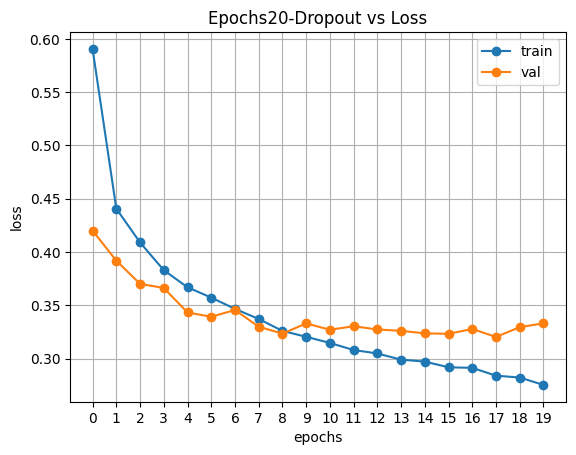

In [27]:
plt.plot(history.history["loss"], marker='o')
plt.plot(history.history["val_loss"], marker='o')

plt.title("Epochs20-Dropout vs Loss")

plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train','val'])

### x축의 값 설정하기
xList = [i for i in range(20)]
plt.xticks(xList)

plt.grid()

# 그래프를 이미지로 저장하기
plt.savefig('./image/01_loss.png',dpi=300)
plt.show()

#### 정확도 시각화

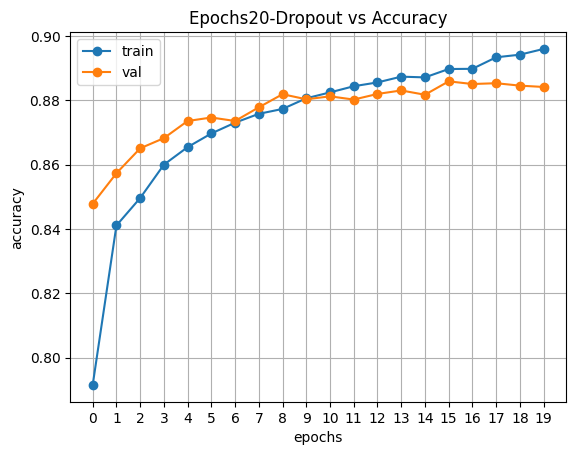

In [28]:
plt.plot(history.history["accuracy"], marker='o')
plt.plot(history.history["val_accuracy"], marker='o')

plt.title("Epochs20-Dropout vs Accuracy")

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(['train','val'])

### x축의 값 설정하기
xList = [i for i in range(20)]
plt.xticks(xList)

plt.grid()

# 그래프를 이미지로 저장하기
plt.savefig('./image/02_Accuracy.png',dpi=300)
plt.show()

### 시각화 결과 해석
#### -  손실률과 정확도 모두 과소작합이 일어나지 않는 epoch 구간중에
#### - 손실률을 기준으로 가장 가까운(훈련과 검증의 거리) epoch의 지점을
#### - 훈련 반복 힛수로 결정하면 됩니다.

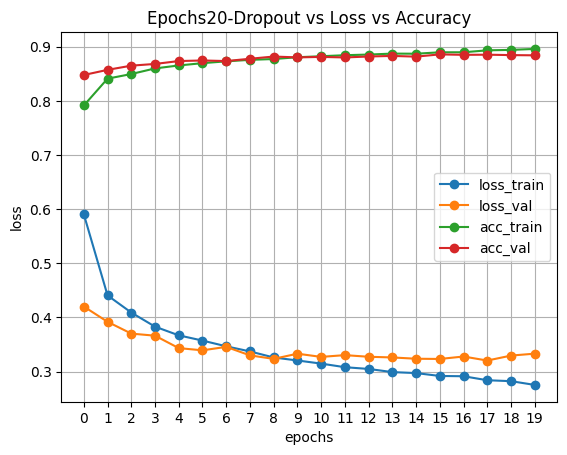

In [29]:
plt.plot(history.history["loss"], marker='o')
plt.plot(history.history["val_loss"], marker='o')
plt.plot(history.history["accuracy"], marker='o')
plt.plot(history.history["val_accuracy"], marker='o')

plt.title("Epochs20-Dropout vs Loss vs Accuracy")

plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['loss_train','loss_val','acc_train','acc_val'])

### x축의 값 설정하기
xList = [i for i in range(20)]
plt.xticks(xList)

plt.grid()

# 그래프를 이미지로 저장하기
plt.savefig('./image/01_Total.png',dpi=300)
plt.show()

### 4.모델 저장(Save) 및 복원(Load)
#### - 최종 훈련모델의 저장방법 2가지
#### 1. 가중치 + 절편만 저장하기
#### 2. 모델 자체를 저장하기

#### 4.1 모델 가중치 + 절편 저장하기 / 읽어오기
#### - save_weights : 훈련에 사용된 가중치 및 절편 저장
#### - load_weights : 모델 읽어오기
#### - 읽어 들인 모델을 사용할 때는 가중치만 있기에 model컴파일부터 진행

In [20]:
# 모델 가중치 저장
model.save_weights('./model/model_weights.h5')

#### 저장된 모델 사용하는 방법
#### 1. 사용할 계층 모델을 생성해야 함
#### - 사용했던 모델 계층과 동일하게 생성해야 함

In [23]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('./model/model_weights.h5')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


####  2. 모델 자체를 저장하기/읽어오기
#### - model.save : 모델저장
#### - keras.models.load_model(model명) : 모델읽기
#### - 읽어들인 모델은 그대로 예측에 사용 가능 - 별도의 컴파일이 필요 없음

In [30]:
# 모델 저장하기
model.save('./model/model_whole.h5')

In [33]:
model = keras.models.load_model('./model/model_whole.h5')

#### 읽어온 모델 사용

In [32]:
model.evaluate(val_sclaed, val_target)

375/375 [==============================] - 0s 384us/step - loss: 0.3331 - accuracy: 0.8842


[0.33307549357414246, 0.8841666579246521]

### 성능향상 2 - Callbacks 함수

#### Callback
#### - 모델 훈련 중간에 특정 작업(함수)를 호출할 수 있는 기능
#### - fit()훈련시에 callbacks 속성을 사용하여 필요한 함수 정의

#### [ 함수들 ]
####  1. ModelCheckpoint() 
#### - epoch 반복 실행시마다 훈련모델을 저장하는 콜백함수로 앞서 저장된 검증손실보다 향상된 경우에만 자동 저장

#### 2. EarlyStopping() 
#### - 훈련을 조기에 종료할 때 사용하는 함수로 일정 epoch반복동안 검증손실에 점수가 향상되지 않으면 자동 중지
#### - 훈련이 정지된 시점의 모델이 최적화된 모델이 될 수 있음
#### - 훈련 중에 모델의 성능이 향상되지 않으면 자동으로 중지하기 때문에 epoch반족 횟수를 크게 지정해도 됨
#### - 일반적으로 과대적합이 시작되기 전에 훈련을 미리 종료 함
#### - 중지된 시점의 모델을 저장하기 위해서 ModelCheckpoint콜백함수와 같이 사용하면 최적화된 모델을 저장할 수 있음
---

#### 콜백함수 적용하기
#### - keras.callbacks.ModelCheckpoint(저장할 모델명)
#### - keras.callbacks.EarlyStopping(patience = n, restore_best_weights= True/False)
#### - patience : 손실이 최소값에 도달한 후 종료하기 전에 기다려야하는 epoch수를 지정
#### - restore_best_weights : 가장 낮은 손실일때의 모델의 하이퍼파라미터로 되돌리기(이전 epoch 검증손실일때의 모델을 update한다고 보면 됨)
#### - 최상의 가중치를 복원해주기 때문에 가중치에 대해서는 별도로 복원을 하지 않아도 됨...그대로 사용하면 됨

In [37]:
# 모델 생성
model = model_fn(keras.layers.Dropout(0.3))

# 모델 컴파일
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics='accuracy')

# 최적화모델 저장 콜백함수 적용하여 모델 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('./model/best_model.h5')

# 조기종료 콜백함수
early_stop = keras.callbacks.EarlyStopping(patience=2,
                                          restore_best_weights=True)

### 아래 모델은 8번째가 가장 좋은 모델이고 2번 더 수행해 10번째에서 정지됨 - 검증손실이 가장 작은 epoch번째

In [39]:
# 모델 훈련
# 모델 훈련 시 callback속성에 리스트타입으로 콜백함수를 적용
history = model.fit(train_scaled,train_target,
                   epochs=20,
                   verbose=1,
                   validation_data=(val_sclaed,val_target),
                   callbacks=[checkpoint_cb,early_stop])

Epoch 1/20
1500/1500 [==============================] - 1s 623us/step - loss: 0.5847 - accuracy: 0.7935 - val_loss: 0.4279 - val_accuracy: 0.8432
Epoch 2/20
1500/1500 [==============================] - 1s 586us/step - loss: 0.4384 - accuracy: 0.8425 - val_loss: 0.3928 - val_accuracy: 0.8560
Epoch 3/20
1500/1500 [==============================] - 1s 572us/step - loss: 0.4069 - accuracy: 0.8515 - val_loss: 0.3667 - val_accuracy: 0.8664
Epoch 4/20
1500/1500 [==============================] - 1s 584us/step - loss: 0.3845 - accuracy: 0.8614 - val_loss: 0.3734 - val_accuracy: 0.8606
Epoch 5/20
1500/1500 [==============================] - 1s 584us/step - loss: 0.3665 - accuracy: 0.8658 - val_loss: 0.3611 - val_accuracy: 0.8689
Epoch 6/20
1500/1500 [==============================] - 1s 580us/step - loss: 0.3521 - accuracy: 0.8716 - val_loss: 0.3486 - val_accuracy: 0.8737
Epoch 7/20
1500/1500 [==============================] - 1s 574us/step - loss: 0.3437 - accuracy: 0.8719 - val_loss: 0.3412 -

### 몇번째 epoch에서 중지되었는지 확인
#### - 추가 반복횟수 patience=2도 훈련횟수에 포함됨
#### - 파이썬의 순서는 0부터이므로 총 횟누는 11회
#### - epoch에 값을 넣을때는 early_stop.stopped_epoch - patience +1

In [40]:
early_stop.stopped_epoch

9